# Stock Market Prediction using Numerical and Textual Analysis
# **Author:** Justin Tracy Manzano - Data Science & Business Analytics Intern
# March 2022
# GRIP @ The Sparks Foundation

In [1]:
!pip install numpy


In [2]:
!pip install keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib import rcParams

In [4]:
data = pd.read_csv('BTC-USD.csv',index_col='Date', parse_dates=True)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Preprocessing

Text(0, 0.5, 'Price')

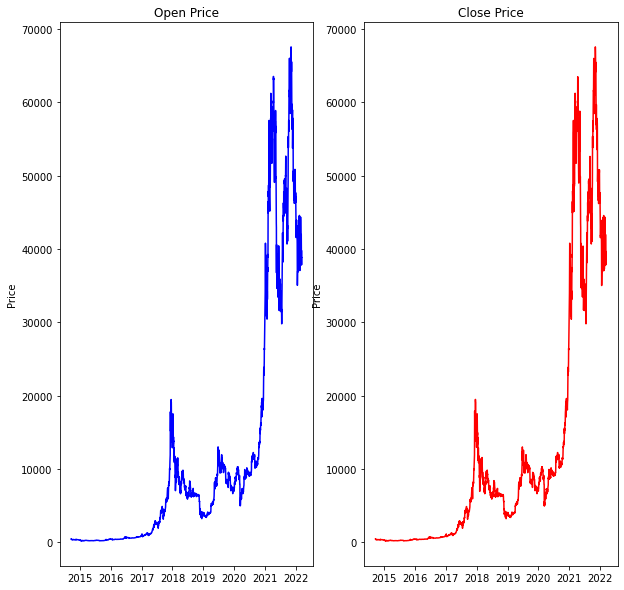

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(data['Open'], 'b')
plt.title('Open Price')
plt.ylabel('Price')

plt.subplot(1,2,2)
plt.plot(data['Close'], 'r')
plt.title('Close Price')
plt.ylabel('Price')

Trading Indicators: 200 EMA and 200 SMA

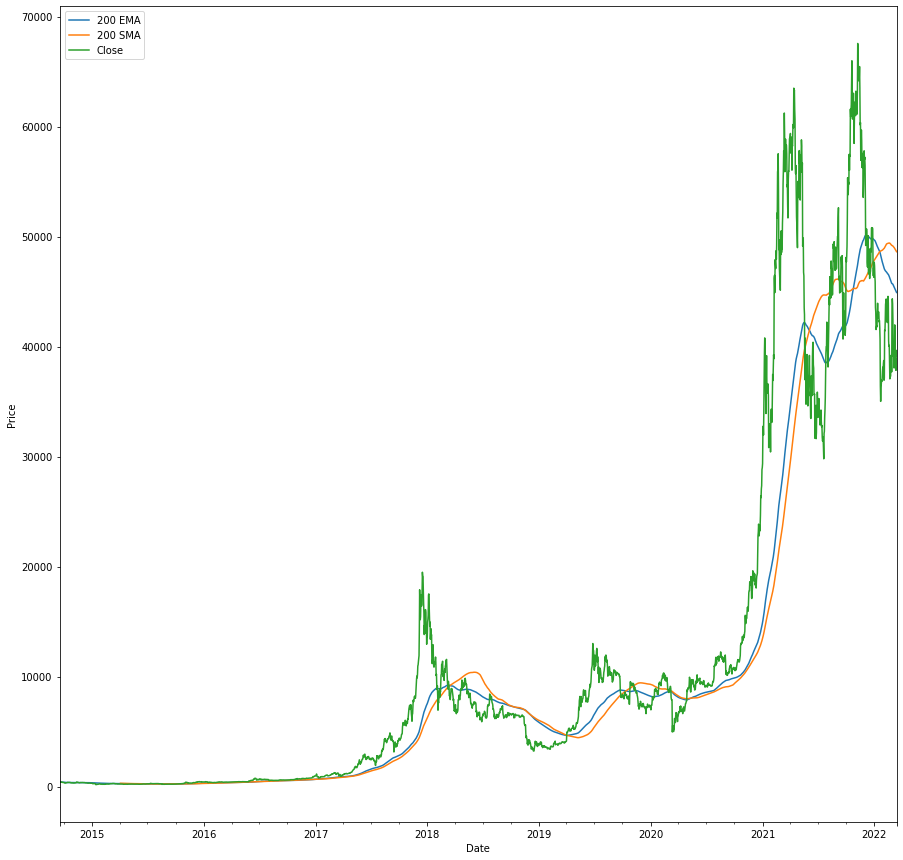

In [8]:
data.ewm(span=200).mean()['Close'].plot(figsize=(15,15), label ='200 EMA' )
data.rolling(window=200).mean()['Close'].plot(figsize=(15,15), label ='200 SMA')
data['Close'].plot(label ='Close')
plt.legend()
plt.ylabel('Price')
rcParams.update({'figure.autolayout': True})
plt.show()

# Train the model

In [9]:
training_orig = data.loc[:, ['Close']]
training_orig

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-03-11,38794.972656
2022-03-12,38904.011719
2022-03-13,37849.664063


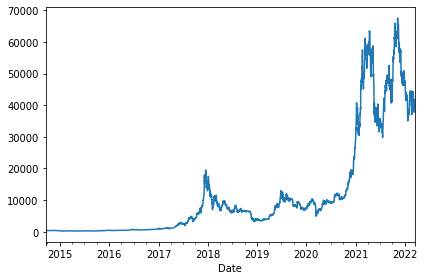

In [10]:
training_orig['Close'].plot()

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training = sc.fit_transform(np.array(training_orig['Close']).reshape(-1,1))
print(training.shape)

(2737, 1)


In [12]:
train_size = int(len(training)*0.65)

train = training[0:train_size]
test = training[train_size:]

print(train.shape)
print(test.shape)

(1779, 1)
(958, 1)


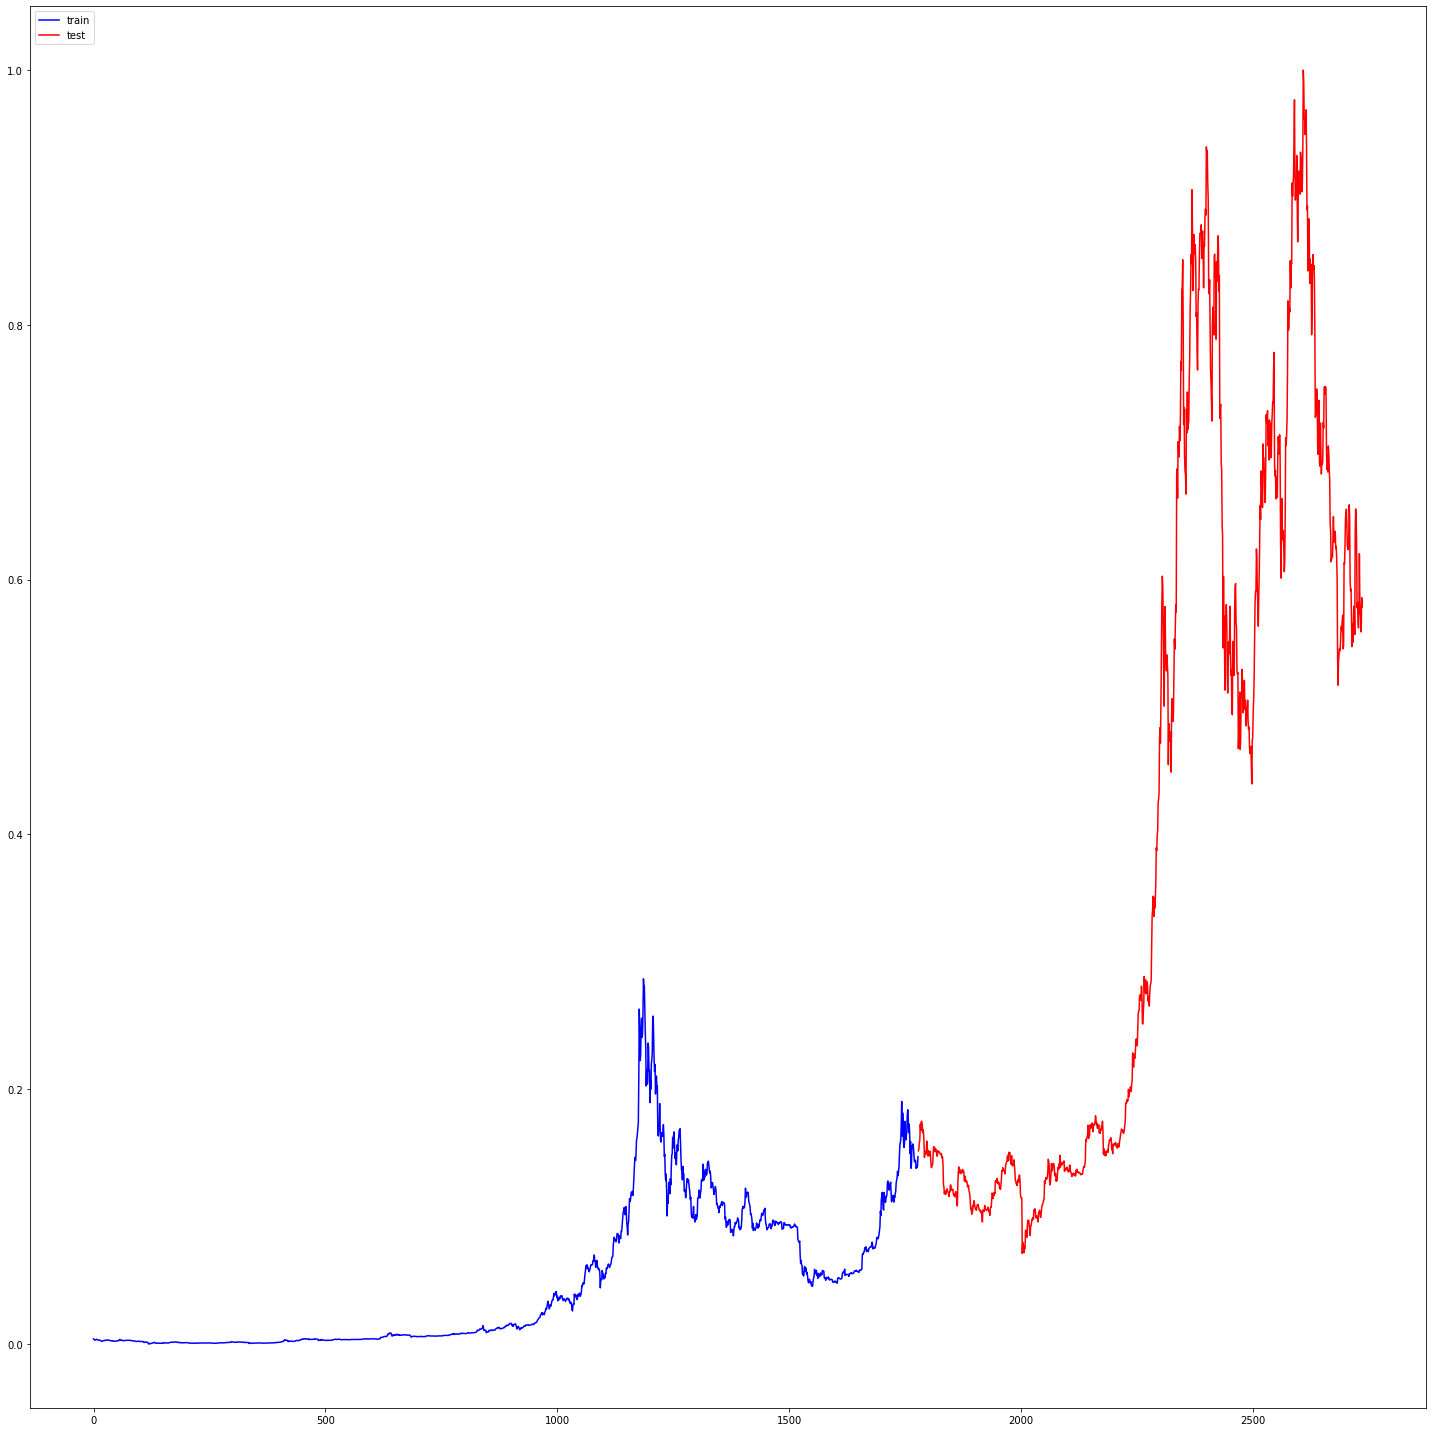

In [13]:
test_plot = np.empty_like(training)
test_plot[:, :] = np.nan
test_plot[len(train): , :] = test

plt.figure(figsize=(20,20))
plt.plot(train, 'blue', label='train')
plt.plot(test_plot, 'red', label='test')
plt.legend(loc='upper left')


In [14]:
def helper(dataset, timestep):
    x = []
    y = []
    for i in range(len(dataset)-timestep-1):
        x.append(dataset[i:(i+timestep), 0])
        y.append(dataset[i+timestep, 0])
    return np.array(x),np.array(y)
    

In [15]:
xtrain, ytrain = helper(train,100)
xtest, ytest = helper(test,100)

In [16]:
xtrain.shape, ytrain.shape

((1678, 100), (1678,))

In [17]:
xtest.shape, ytest.shape

((857, 100), (857,))

In [18]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)
xtest.shape

(857, 100, 1)

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(50))
model.add(Dropout(0.3))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(xtrain, ytrain, epochs=10, batch_size=32)

Epoch 1/10
53/53 [==============================] - 21s 97ms/step - loss: 9.1689e-04
Epoch 2/10
53/53 [==============================] - 5s 95ms/step - loss: 3.3423e-04
Epoch 3/10
53/53 [==============================] - 5s 95ms/step - loss: 3.4411e-04
Epoch 4/10
53/53 [==============================] - 5s 93ms/step - loss: 2.5010e-04
Epoch 5/10
53/53 [==============================] - 5s 92ms/step - loss: 2.5698e-04
Epoch 6/10
53/53 [==============================] - 5s 92ms/step - loss: 2.3018e-04
Epoch 7/10
53/53 [==============================] - 5s 93ms/step - loss: 2.1076e-04
Epoch 8/10
53/53 [==============================] - 5s 93ms/step - loss: 2.0846e-04
Epoch 9/10
53/53 [==============================] - 5s 93ms/step - loss: 2.1156e-04
Epoch 10/10
53/53 [==============================] - 5s 93ms/step - loss: 1.8660e-04


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [22]:
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest, test_predict)

0.0237485330970544

In [24]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

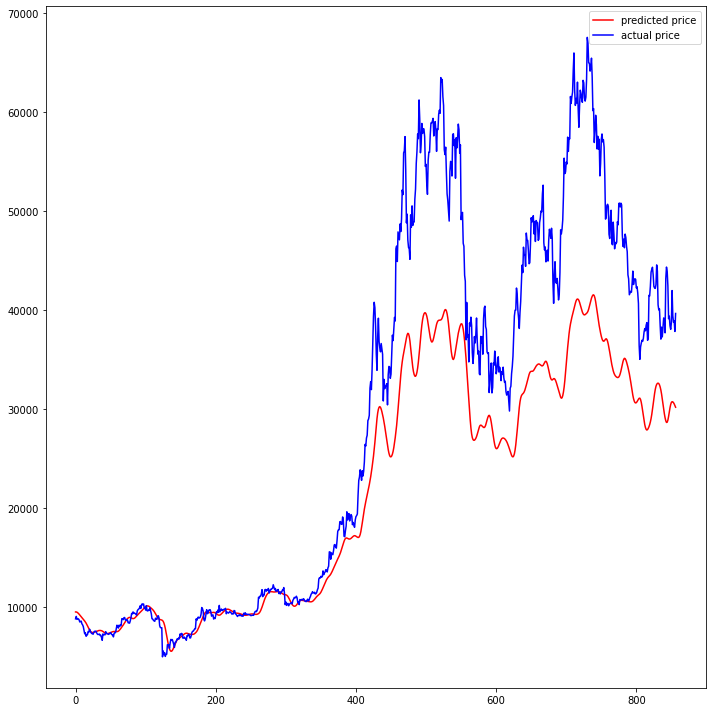

In [25]:
plt.figure(figsize=(10,10))
plt.plot(test_predict, color = 'red', label = 'predicted price')
plt.plot(sc.inverse_transform(ytest.reshape(-1,1)), color= 'blue', label='actual price')
plt.legend()
plt.show()

In [26]:
x_input = test[len(test)-100:, ].reshape(1,-1)

temp = list(x_input)
temp = temp[0].tolist()
len(temp)

100

In [27]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
        x_input=np.array(temp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp.extend(yhat[0].tolist())
        temp=temp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.44014412]
101
1 day input [0.74970973 0.74681178 0.70477692 0.69841359 0.72986104 0.74078019
 0.69090753 0.68905488 0.72294912 0.70467757 0.68296353 0.69255909
 0.69045545 0.69302653 0.72354107 0.71896907 0.75096295 0.75152175
 0.74569976 0.75133359 0.7488243  0.70354132 0.68656304 0.69744637
 0.68451128 0.70499493 0.69992592 0.68676198 0.67844393 0.64388962
 0.6378341  0.61404633 0.61665862 0.61929497 0.61795439 0.6315263
 0.64953    0.62938522 0.63692548 0.63807848 0.6371359  0.62432473
 0.62618086 0.61681275 0.6010251  0.53835732 0.51718068 0.53567866
 0.54128083 0.5457278  0.54421594 0.54846165 0.55804927 0.56330012
 0.5600269  0.56841886 0.57227927 0.54571267 0.54870453 0.61320009
 0.61231402 0.62672696 0.64791524 0.65204294 0.6553128  0.64383189
 0.62666024 0.62423448 0.62353773 0.62931618 0.65882089 0.64971932
 0.59891189 0.59138785 0.5927409  0.56765098 0.54752747 0.56549407
 0.55081124 0.56618531 0.57926776 0.57764923 0.55694305 0.63831348
 0.65554785 0.64915925 0.62731096 

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

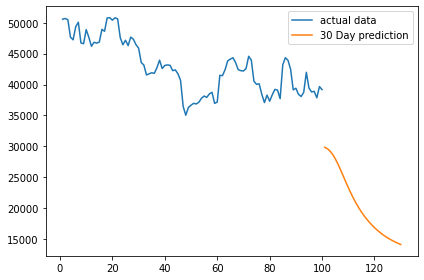

In [29]:
plt.plot(day_new,sc.inverse_transform(training[len(training)-100:]), label='actual data')
plt.plot(day_pred,sc.inverse_transform(lst_output), label='30 Day prediction')
plt.legend()

# Sentiment Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [31]:
news = pd.read_csv('india-news-headlines.csv')
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [32]:
news['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3424062     True
3424063     True
3424064     True
3424065     True
3424066     True
Name: publish_date, Length: 3424067, dtype: bool

In [33]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')
news

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [34]:
news = news.drop_duplicates('publish_date', keep='first').sort_index()

news = news.reset_index()

In [35]:
news.rename(columns={'publish_date': 'Date'},inplace = True)
news.head()

,index,Date,headline_category,headline_text
0,0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,2001-01-03,unknown,Powerless north India gropes in the dark
2,127,2001-01-04,unknown,The string that pulled Stephen Hawking to India
3,280,2001-01-05,unknown,Light combat craft takes India into club class
4,406,2001-01-06,unknown,Light combat craft takes India into club class


In [36]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              7262 non-null   int64         
 1   Date               7262 non-null   datetime64[ns]
 2   headline_category  7262 non-null   object        
 3   headline_text      7262 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 227.1+ KB


In [37]:
news['headline_category'].value_counts()

unknown                                   987
entertainment.hindi.bollywood             727
india                                     342
life-style.relationships.man-woman        332
edit-page                                 256
                                         ... 
entertainment.gujarati.movies.news          1
past-winners                                1
chhattisgarh                                1
entertainment.hindi.music.music-events      1
sports.racing.f1-teams                      1
Name: headline_category, Length: 324, dtype: int64

In [38]:
city_data = news.dropna()[news.dropna()['headline_category'].str.contains('city')]
city_data

,index,Date,headline_category,headline_text
8,642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors
48,2215,2001-03-09,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,2001-05-22,city.pune,She turned and fought
116,4693,2001-05-27,city.bengaluru,Need to boost exports; says bank head
118,4917,2001-05-29,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7245,3415584,2020-12-15,city.nagpur,1;147 RT-PCR tests in a day; only 3 found +ve ...
7248,3417083,2020-12-18,city.ahmedabad,Cops; panch witnesses sniffed suspects' mouths...
7249,3417582,2020-12-19,city.mumbai,Rally champion only crowned if half WRC season...
7253,3419580,2020-12-23,city.vadodara,Sawmill in Makarpura GIDC gutted; none hurt


In [39]:
city_split = pd.DataFrame(columns=['city_name'])

In [40]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [41]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [42]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [43]:
# re-setting the index
city_data.reset_index(inplace=True)

In [44]:
# see the final data which contain city_name column
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
1,48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,2001-05-22,She turned and fought,pune
3,116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
4,118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [45]:
city_data.drop(['level_0', 'index'],axis=1)

,Date,headline_text,city_name
0,2001-01-10,Fend for yourselves; Pande tells doctors,patna
1,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
2,2001-05-22,She turned and fought,pune
3,2001-05-27,Need to boost exports; says bank head,bengaluru
4,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
1236,2020-12-15,1;147 RT-PCR tests in a day; only 3 found +ve ...,nagpur
1237,2020-12-18,Cops; panch witnesses sniffed suspects' mouths...,ahmedabad
1238,2020-12-19,Rally champion only crowned if half WRC season...,mumbai
1239,2020-12-23,Sawmill in Makarpura GIDC gutted; none hurt,vadodara


In [46]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', None, 'goa', 'nagpur', 'guwahati', 'rajkot',
       'bhubaneswar', 'surat', 'allahabad', 'varanasi', 'vadodara',
       'mangaluru', 'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur',
       'thane', 'hubballi', 'kochi', 'navimumbai', 'gurgaon', 'indore',
       'kolhapur', 'agartala', 'madurai', 'bareilly', 'aurangabad',
       'meerut', 'visakhapatnam', 'trichy', 'coimbatore', 'jammu',
       'dehradun', 'nashik', 'noida', 'puducherry', 'erode', 'chennai',
       'jind', 'ghaziabad', 'bhopal', 'jamshedpur', 'vijayawada', 'agra',
       'shimla', 'amritsar'], dtype=object)

# Step 2.3: Representing number of headline text (News Headline) per city

In [47]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [48]:
#for better understanding remane the column
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)

In [49]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
city_name,
bengaluru,113
ahmedabad,81
delhi,81
mumbai,79
hyderabad,72
pune,59
patna,54
chandigarh,52
nagpur,49


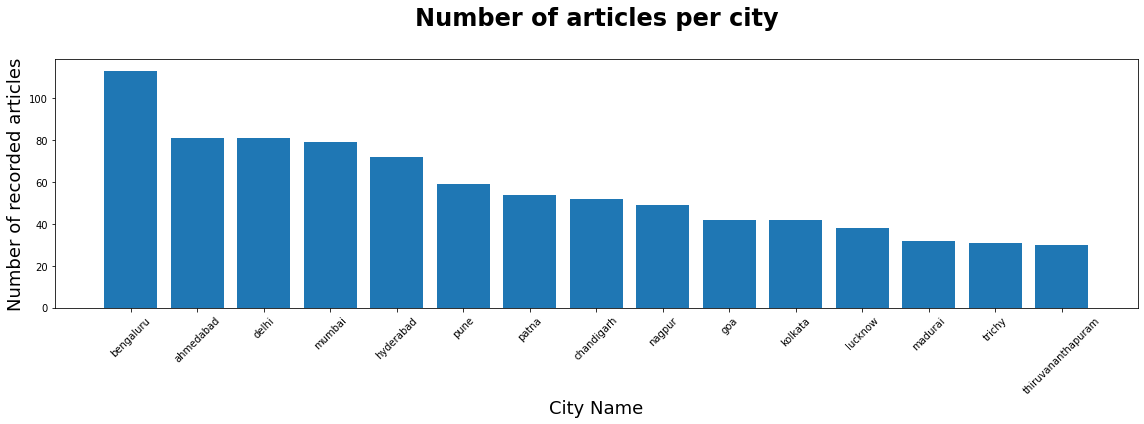

In [50]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(16,6))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

# Representing Number of News Headlines per year and per city

In [51]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
1,48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,2001-05-22,She turned and fought,pune
3,116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
4,118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [52]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [53]:
# dropping unnecessary columns
city_data.drop(columns=['Date','index'],axis=1,inplace=True)

In [54]:
# final result
city_data.head()

,level_0,headline_text,city_name,Year
0,8,Fend for yourselves; Pande tells doctors,patna,2001
1,48,Maneka asks govt to take back land for cow she...,delhi,2001
2,114,She turned and fought,pune,2001
3,116,Need to boost exports; says bank head,bengaluru,2001
4,118,US visit won't be piece of cake for Krishna,bengaluru,2001


In [55]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1

In [56]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [57]:
city_data_2.head()

,level_0,city_name,Year,Number_of_headline_text
0,8,patna,2001,1
1,48,delhi,2001,1
2,114,pune,2001,1
3,116,bengaluru,2001,1
4,118,bengaluru,2001,1


In [58]:
top_15_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,113
ahmedabad,81
delhi,81
mumbai,79
hyderabad,72
pune,59
patna,54


In [59]:
# creating new data_set for top 7 cities with year 

city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_luck = city_data_2[city_data_2.city_name == 'luck']

In [60]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_luck]
data_famous_cities = pd.concat(famous_cities)

In [61]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)

In [62]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(485, 5)


,index,level_0,city_name,Year,Number_of_headline_text
0,3,116,bengaluru,2001,1
1,4,118,bengaluru,2001,1
2,5,119,bengaluru,2001,1
3,7,135,bengaluru,2001,1
4,10,138,bengaluru,2001,1


In [63]:
data_famous_cities=data_famous_cities.drop(['level_0'],axis=1)
data_famous_cities.head()

,index,city_name,Year,Number_of_headline_text
0,3,bengaluru,2001,1
1,4,bengaluru,2001,1
2,5,bengaluru,2001,1
3,7,bengaluru,2001,1
4,10,bengaluru,2001,1


In [64]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()

In [65]:
city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,pune
Year,,,,,,
2001,12.0,24.0,7.0,11.0,12.0,10.0
2002,5.0,5.0,1.0,8.0,6.0,8.0
2003,8.0,8.0,3.0,4.0,9.0,4.0
2004,11.0,2.0,16.0,7.0,9.0,12.0
2005,6.0,12.0,17.0,NaN,1.0,2.0


In [66]:
city_year_count.head()

Year
2001    124
2002     55
2003     62
2004     92
2005     43
Name: Number_of_headline_text, dtype: int64

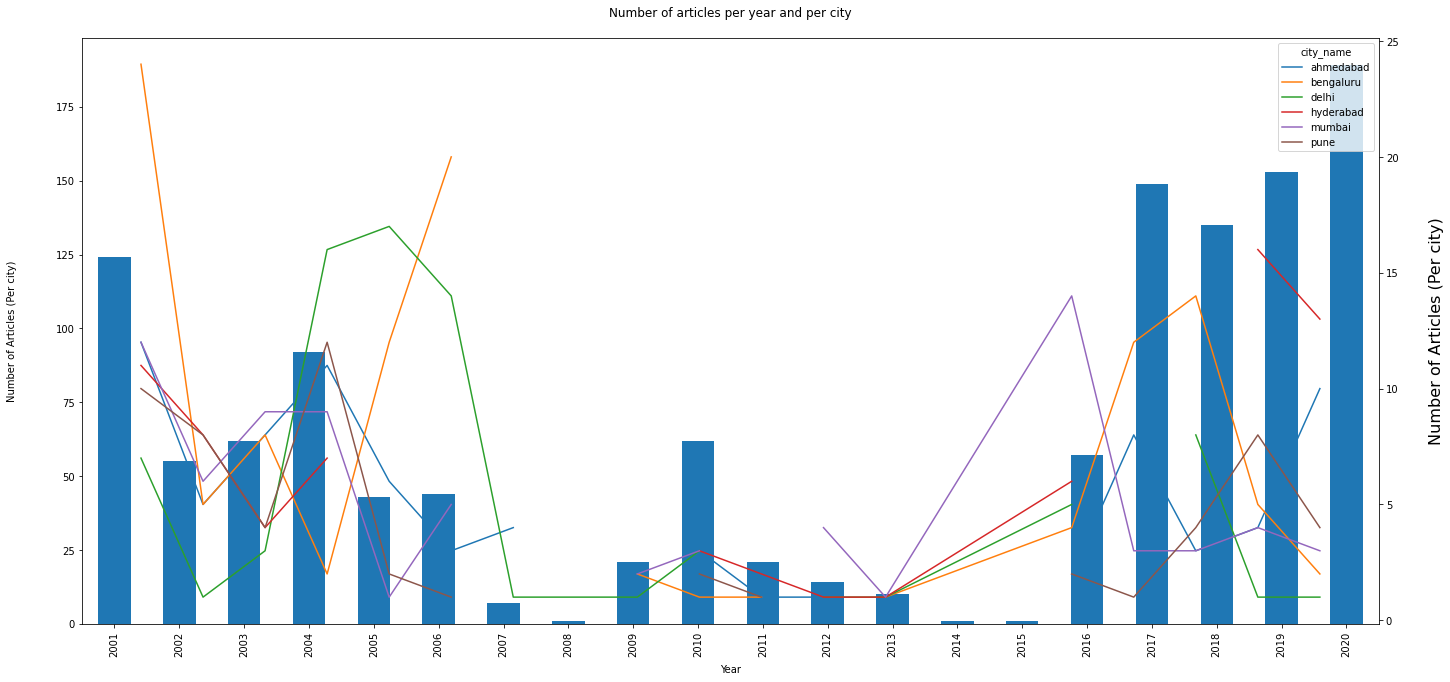

<Figure size 1440x720 with 0 Axes>

In [67]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

# Sentiment Analysis of News Headlines

In [68]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [69]:
news['Result'] = np.array([getAnalysis_polarity(headline) for headline in news['headline_text']])

In [70]:
final_result = news.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,650
neutral,4868
positive,1744


In [71]:
negative = (final_result.loc['negative'] / len(news))*100
neutral = (final_result.loc['neutral'] / len(news))*100
positive = (final_result.loc['positive'] / len(news))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    24.015423
Name: positive, dtype: float64


Negative Headlines:  headline_text    8.950702
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    67.033875
Name: neutral, dtype: float64


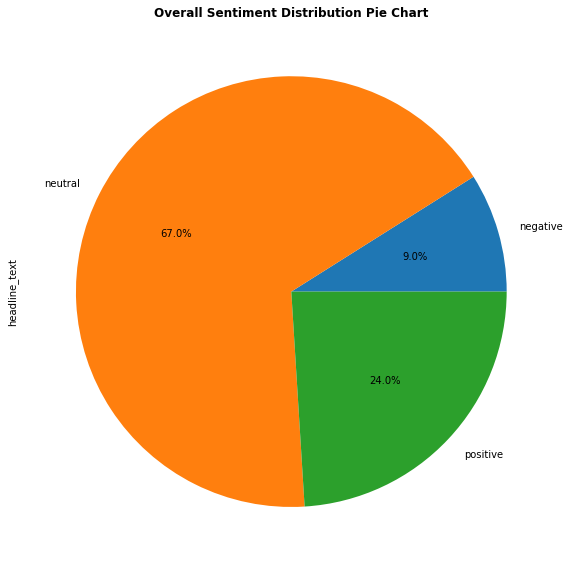

In [72]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()